In [1]:
%matplotlib inline

# Pandas and DataFrames

Often, we have tables of data--collections of named columns arranged in rows.  The **Pandas** package gives us a **DataFrame()** class that lets us index these columns the same way as with dicts, while still getting the benefit of Numpy arrays, meaning we can still write vectorized code.  

Let's start playing with the analysis now.  We'll examine Pandas in more depth in the coming days.

In [2]:
import pandas as pd

Please open the file “MentalRotationData.xlsx” and use it to answer the following questions about the results of the Mental Rotation psychology experiment. If you reach the end of the exercises, explore the dataset and DataFrames more and see what you can find about this experiment!

In [3]:
df = pd.read_csv('MentalRotation.csv')
df.head()

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex
0,49,1,0,0,n,3107,1,32,M
1,49,2,150,0,n,2930,1,32,M
2,49,3,150,1,b,1874,1,32,M
3,49,4,100,1,b,3793,1,32,M
4,49,5,50,1,b,2184,1,32,M


## Examining the Dataset

**head()**, **tail()**, **sample()**

Look at the first 5 lines of the dataset

In [4]:
df.head()

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex
0,49,1,0,0,n,3107,1,32,M
1,49,2,150,0,n,2930,1,32,M
2,49,3,150,1,b,1874,1,32,M
3,49,4,100,1,b,3793,1,32,M
4,49,5,50,1,b,2184,1,32,M


Look at the last 5 lines of the dataset

In [5]:
df.tail()

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex
5066,33,92,150,1,b,2095,1,20,F
5067,33,93,150,0,n,2125,1,20,F
5068,33,94,50,0,n,1226,1,20,F
5069,33,95,100,1,b,2783,1,20,F
5070,33,96,0,0,n,1017,1,20,F


Check 3 random lines in the dataset.

In [6]:
df.sample(3)

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex
3321,13,24,150,0,n,4073,1,19,M
3597,9,22,0,0,n,2523,1,19,F
871,48,18,150,1,b,2698,1,18,F


How Many Total Trials (rows) are in the study?

In [7]:
len(df)

5071

In [8]:
df.shape[0]

5071

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5071 entries, 0 to 5070
Data columns (total 9 columns):
Subject     5071 non-null int64
Trial       5071 non-null int64
Angle       5071 non-null int64
Matching    5071 non-null int64
Response    5071 non-null object
Time        5071 non-null int64
Correct     5071 non-null int64
Age         5071 non-null int64
Sex         5071 non-null object
dtypes: int64(7), object(2)
memory usage: 356.6+ KB


What is the maximum number of trials that one subject performed?

In [10]:
df['Trial'].max()

96

### Making New Columns

Convert the Time column to seconds by dividing it by 1000.

In [11]:
df['TimeSec'] = df['Time'] / 1000
df.head()

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex,TimeSec
0,49,1,0,0,n,3107,1,32,M,3.107
1,49,2,150,0,n,2930,1,32,M,2.930
2,49,3,150,1,b,1874,1,32,M,1.874
3,49,4,100,1,b,3793,1,32,M,3.793
4,49,5,50,1,b,2184,1,32,M,2.184


Change the "Correct" column to *bool* (True/False) using the **astype()** method

In [22]:
df['isCorrect'] = df['Correct'].astype(bool)
df.head()

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex,TimeSec,isCorrect,isCorrect2
0,49,1,0,0,n,3107,1,32,M,3.107,True,True
1,49,2,150,0,n,2930,1,32,M,2.930,True,True
2,49,3,150,1,b,1874,1,32,M,1.874,True,True
3,49,4,100,1,b,3793,1,32,M,3.793,True,True
4,49,5,50,1,b,2184,1,32,M,2.184,True,True


### The mean() method

What is the mean response time, across all trials?

In [23]:
df['TimeSec'].mean()

2.732093275488068

In [26]:
import numpy as np
np.mean(df['TimeSec'])

2.732093275488068

What percent of trials were answered correctly?

In [35]:
np.mean(df['isCorrect'] == True)

0.9045553145336226

In [38]:
df['isCorrect'].mean()

0.9045553145336226

In [39]:
df['Correct'].mean()

0.9045553145336226

What percent of trials were “Matching” trials?

In [41]:
df['Matching'].mean()

0.5006901991717609

### Slicing

Is there a difference in accuracy between matching and non-matching trials?

In [48]:
isMatching = df.loc[df['Matching'] == 1, 'Correct']
notMatching = df.loc[df['Matching'] == 0, 'Correct']
isMatching.mean(), notMatching.mean()

(0.8999606144151241, 0.9091627172195893)

In [49]:
isMatching = df[df['Matching'] == 1]['Correct']
notMatching = df[df['Matching'] == 0]['Correct']
isMatching.mean(), notMatching.mean()

(0.8999606144151241, 0.9091627172195893)

In [50]:
isMatching = df['Correct'].loc[df['Matching'] == 1]
notMatching = df['Correct'].loc[df['Matching'] == 0]
isMatching.mean(), notMatching.mean()

(0.8999606144151241, 0.9091627172195893)

In [51]:
df.groupby('Matching')['Correct'].mean()

Matching
0    0.909163
1    0.899961
Name: Correct, dtype: float64

Is there a response time difference between matching and nonmatching
trials?

Is there a response time difference between matching and nonmatching
trials, for different rotation Angles?

In [58]:
df.groupby(['Matching', 'Angle'])['TimeSec'].mean().unstack()

Angle,0,50,100,150
Matching,,,,
0,2.350322,2.616078,3.169240,3.244274
1,1.554967,2.508193,3.107849,3.332629


### Plotting

Plot the response time distribution as a histogram.

In [64]:
3;

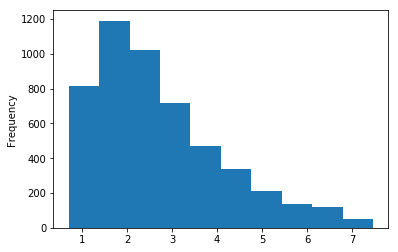

In [67]:
df.TimeSec.plot.hist();

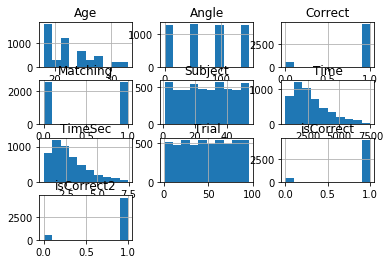

In [78]:
df.hist();

Is there a correlation between Angle of mental rotation and response time?  Visualize the relationship

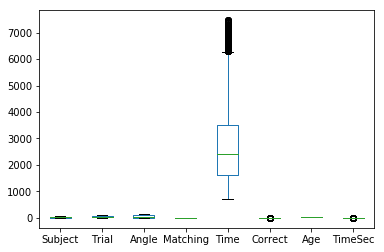

In [72]:
df.plot.box(by='Angle')